**Accidentes de tráfico de la ciudad de Madrid ENERO 2025**

En este análisis se explorarán los datos sobre los accidentes de tráfico ocurridos en la ciudad de Madrid. Se utilizará un conjunto de datos proporcionado por el Portal de Datos Abiertos del Ayuntamiento de Madrid, el cual contiene información detallada sobre cada siniestro, incluyendo variables como la fecha, ubicación, número de víctimas, condiciones climáticas y tipo de vehículo involucrado.

El objetivo de este estudio es comprender mejor la distribución y las características de los accidentes en la ciudad a través de técnicas de exploración y análisis de datos.

FUENTE: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default&vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&utm_source=chatgpt.com


**Preguntas disparadoras**

¿Cuántos accidentes han ocurrido en el período de tiempo analizado?

¿Cómo están distribuidos los accidentes por distrito? ¿Hay zonas con más accidentes que otras?

¿Cuáles son las condiciones meteorológicas más comunes en los accidentes?

¿Qué tipos de vehículos están más involucrados en los accidentes?

¿A qué horas del día suelen ocurrir más accidentes? ¿Se observan picos en horas pico o nocturnas?

¿Los accidentes aumentan los fines de semana en comparación con los días hábiles?

¿Qué distritos tienen la mayor cantidad de accidentes con víctimas?

¿Existe una relación entre el tipo de accidente y la gravedad del mismo?

¿Los accidentes con resultado de muerte o lesiones graves se concentran en ciertas condiciones específicas (clima, hora, tipo de vehículo)?

¿Hay una relación entre el consumo de alcohol/drogas y la severidad de los accidentes?

¿Qué factores tienen más impacto en la cantidad de víctimas en un accidente?
¿Es posible predecir la gravedad de un accidente según las condiciones del momento?

¿Cómo afecta la presencia de lluvia o niebla en la cantidad de accidentes?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargar el dataset
df = pd.read_excel("/content/DATASET 2025_Accidentalidad.xlsx")

In [5]:
# Mostrar información general sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        4075 non-null   object        
 1   fecha                 4075 non-null   datetime64[ns]
 2   hora                  4075 non-null   object        
 3   localizacion          4075 non-null   object        
 4   numero                4075 non-null   object        
 5   cod_distrito          4075 non-null   int64         
 6   distrito              4075 non-null   object        
 7   tipo_accidente        4075 non-null   object        
 8   estado_meteorológico  3593 non-null   object        
 9   tipo_vehiculo         4057 non-null   object        
 10  tipo_persona          4075 non-null   object        
 11  rango_edad            4075 non-null   object        
 12  sexo                  4075 non-null   object        
 13  cod_lesividad     

In [6]:
# Mostrar las primeras filas
df.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Conductor,De 30 a 34 años,Hombre,14.0,Sin asistencia sanitaria,445269.641,4475978.517,N,1.0
1,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Pasajero,De 21 a 24 años,Mujer,14.0,Sin asistencia sanitaria,445269.641,4475978.517,N,NaN
2,2025S000001,2025-01-27,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Peatón,De 55 a 59 años,Hombre,3.0,Ingreso superior a 24 horas,445269.641,4475978.517,N,NaN
3,2025S000056,2025-01-01,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,De 30 a 34 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,442965.751,4477385.334,N,NaN
4,2025S000056,2025-01-01,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,14.0,Sin asistencia sanitaria,442965.751,4477385.334,N,NaN


In [7]:
# Revisar valores nulos y duplicados
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
num_expediente             0
fecha                      0
hora                       0
localizacion               0
numero                     0
cod_distrito               0
distrito                   0
tipo_accidente             0
estado_meteorológico     482
tipo_vehiculo             18
tipo_persona               0
rango_edad                 0
sexo                       0
cod_lesividad           1775
lesividad               1775
coordenada_x_utm           8
coordenada_y_utm           8
positiva_alcohol          17
positiva_droga          4060
dtype: int64


In [8]:
print("\nValores duplicados en el dataset:", df.duplicated().sum())


Valores duplicados en el dataset: 178


In [9]:
# Eliminar duplicados
df = df.drop_duplicates()

In [33]:
# Convertir la columna "hora" asegurando que tiene formato adecuado
def convertir_hora(valor):
    try:
        return pd.to_datetime(valor, format='%H:%M:%S').hour
    except:
        try:
            return int(valor)
        except:
            return None

In [36]:
# Convertir "fecha" a datetime si no está en el formato correcto
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

In [38]:
# Verificar si hay columnas categóricas que deban ser de tipo string
columnas_categoricas = ["estado_meteorológico", "tipo_vehiculo", "distrito", "lesividad", "positiva_alcohol"]
for col in columnas_categoricas:
    df[col] = df[col].astype(str)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3897 entries, 0 to 4074
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        3897 non-null   object        
 1   fecha                 3897 non-null   datetime64[ns]
 2   hora                  3897 non-null   int64         
 3   localizacion          3897 non-null   object        
 4   numero                3897 non-null   object        
 5   cod_distrito          3897 non-null   int64         
 6   distrito              3897 non-null   object        
 7   tipo_accidente        3897 non-null   object        
 8   estado_meteorológico  3897 non-null   object        
 9   tipo_vehiculo         3897 non-null   object        
 10  tipo_persona          3897 non-null   object        
 11  rango_edad            3897 non-null   object        
 12  sexo                  3897 non-null   object        
 13  cod_lesividad         3

In [10]:
# Rellenar valores nulos en estado meteorológico con 'Desconocido'
df["estado_meteorológico"].fillna("Desconocido", inplace=True)

<ipython-input-10-a3a9a22a26cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["estado_meteorológico"].fillna("Desconocido", inplace=True)


In [11]:
# Rellenar valores nulos en tipo de vehículo con 'No especificado'
df["tipo_vehiculo"].fillna("No especificado", inplace=True)

<ipython-input-11-30de8cc9be01>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tipo_vehiculo"].fillna("No especificado", inplace=True)


In [12]:
# Rellenar valores nulos en positiva_droga con 0
df["positiva_droga"].fillna(0, inplace=True)

<ipython-input-12-1b87cfbe4b9f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["positiva_droga"].fillna(0, inplace=True)


In [15]:
# Rellenar valores nulos en positiva_alcohol con 'Desconocido'
df["positiva_alcohol"].fillna("Desconocido", inplace=True)

<ipython-input-15-015565ed524e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["positiva_alcohol"].fillna("Desconocido", inplace=True)


In [17]:
# Rellenar valores nulos en lesividad con 'Desconocido'
df["lesividad"].fillna("Desconocido", inplace=True)

<ipython-input-17-ab5a75f2d415>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["lesividad"].fillna("Desconocido", inplace=True)


In [19]:
# Rellenar valores nulos en cod_lesividad con 'Desconocido'
df["cod_lesividad"].fillna("Desconocido", inplace=True)

<ipython-input-19-c697e9d37cab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cod_lesividad"].fillna("Desconocido", inplace=True)
<ipython-input-19-c697e9d37cab>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["cod_lesividad"].fillna("Desconocido", inplace=True)


In [21]:
# Rellenar valores nulos en coordenada_x_utm con 'no informa'
df["coordenada_x_utm"].fillna("no informa", inplace=True)

<ipython-input-21-975f971c9aa8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coordenada_x_utm"].fillna("no informa", inplace=True)
<ipython-input-21-975f971c9aa8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no informa' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["coordenada_x_utm"].fillna("no informa", inplace=True)


In [22]:
# Rellenar valores nulos en coordenada_y_utm con 'no informa'
df["coordenada_y_utm"].fillna("no informa", inplace=True)

<ipython-input-22-7a2007fe8e24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["coordenada_y_utm"].fillna("no informa", inplace=True)
<ipython-input-22-7a2007fe8e24>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no informa' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["coordenada_y_utm"].fillna("no informa", inplace=True)


In [23]:
# Revisar nuevamente los valores nulos
print("\nValores nulos tras limpieza:")
print(df.isnull().sum())


Valores nulos tras limpieza:
num_expediente          0
fecha                   0
hora                    0
localizacion            0
numero                  0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
coordenada_x_utm        0
coordenada_y_utm        0
positiva_alcohol        0
positiva_droga          0
dtype: int64


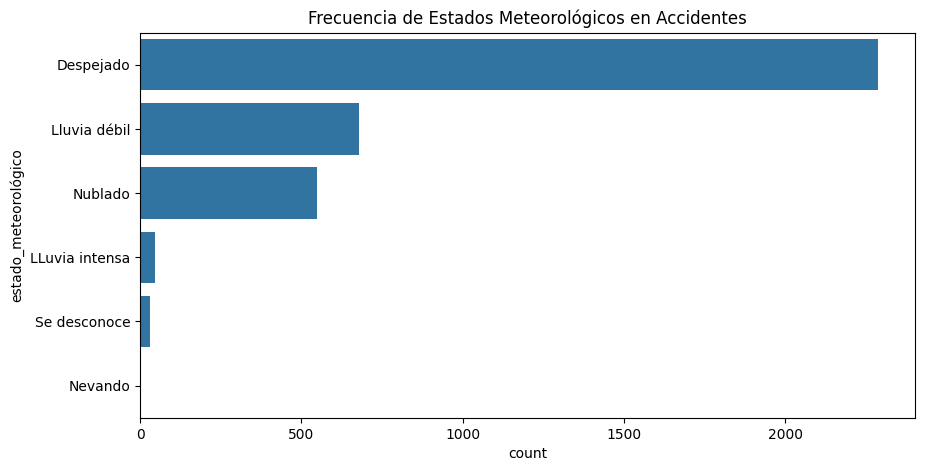

In [6]:
# Frecuencia de estados meteorològicos en accidentes
plt.figure(figsize=(10,5))
sns.countplot(y=df["estado_meteorológico"], order=df["estado_meteorológico"].value_counts().index)
plt.title("Frecuencia de Estados Meteorológicos en Accidentes")
plt.show()


El gráfico muestra que ciertos estados meteorológicos, como cielos despejados o nubosos, son los más frecuentes en accidentes, mientras que condiciones extremas, como nieve o niebla densa, son menos comunes.

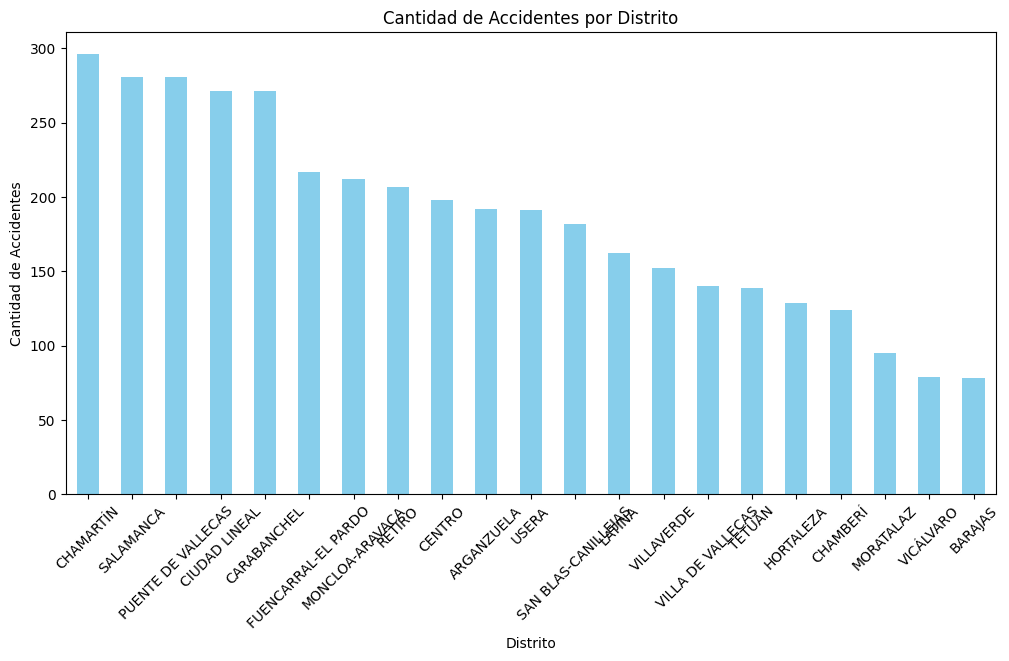

In [25]:
# Distribución de accidentes por distrito
plt.figure(figsize=(12,6))
df["distrito"].value_counts().plot(kind='bar', color='skyblue')
plt.title("Cantidad de Accidentes por Distrito")
plt.xlabel("Distrito")
plt.ylabel("Cantidad de Accidentes")
plt.xticks(rotation=45)
plt.show()

El gráfico refleja una mayor concentración de accidentes en algunos distritos específicos, lo que podría estar relacionado con factores como el tráfico intenso o la infraestructura vial.

<ipython-input-40-093c7645d479>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_filtrado["lesividad"],


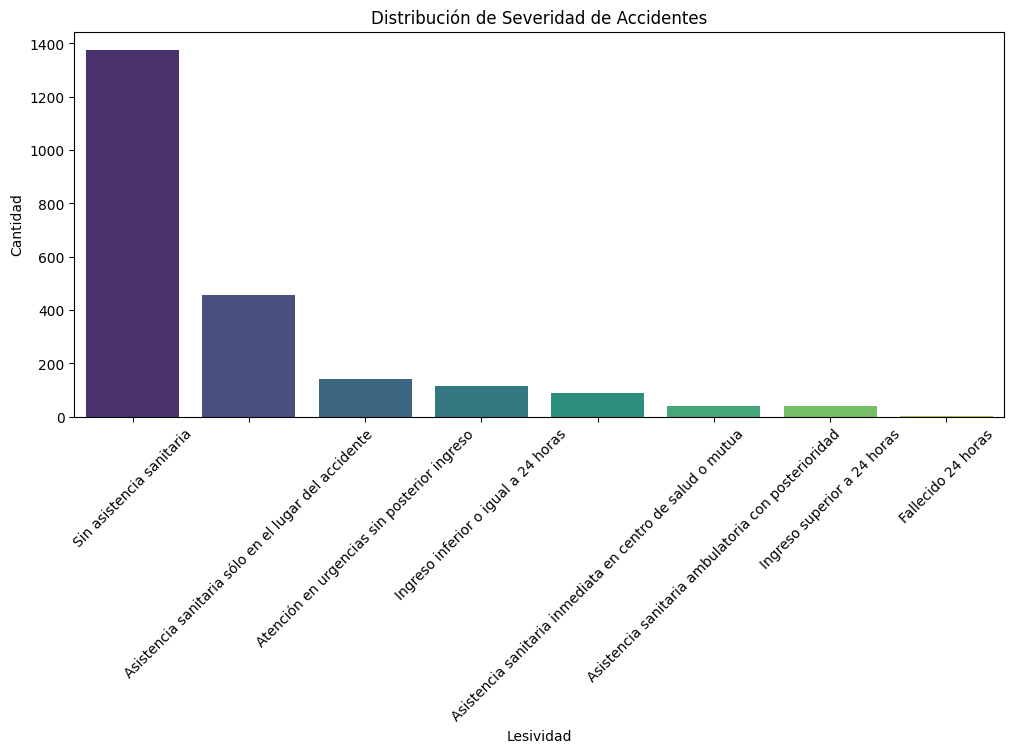

In [40]:
# Análisis de la severidad de los accidentes
plt.figure(figsize=(12,5))
df_filtrado = df[df["lesividad"] != "Desconocido"]
sns.countplot(x=df_filtrado["lesividad"],
              order=df_filtrado["lesividad"].value_counts().index,
              palette="viridis")

plt.title("Distribución de Severidad de Accidentes")
plt.xlabel("Lesividad")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, fontsize=10)
plt.show()

La mayoría de los accidentes presentan una lesividad leve, mientras que los accidentes graves o mortales son menos frecuentes. Esto sugiere que, aunque los accidentes son comunes, la mayoría no resultan en consecuencias graves.

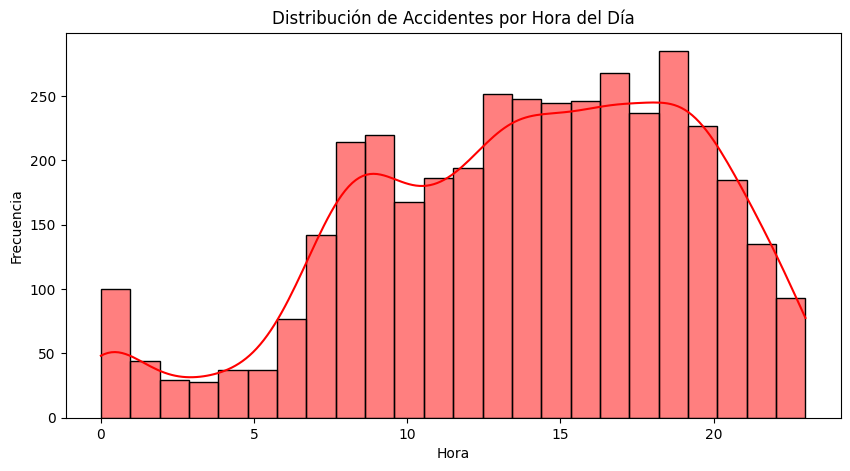

In [34]:
# Análisis temporal de accidentes
df["fecha"] = pd.to_datetime(df["fecha"])

plt.figure(figsize=(10,5))
sns.histplot(df["hora"].dropna(), bins=24, kde=True, color='red')
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.show()


Los accidentes se distribuyen a lo largo de todo el día, con un ligero aumento en las horas pico de tráfico, lo que sugiere que la congestión vehicular puede influir en la frecuencia de los siniestros.

<ipython-input-41-43dcf571bd97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['es_fin_de_semana'], palette='coolwarm')


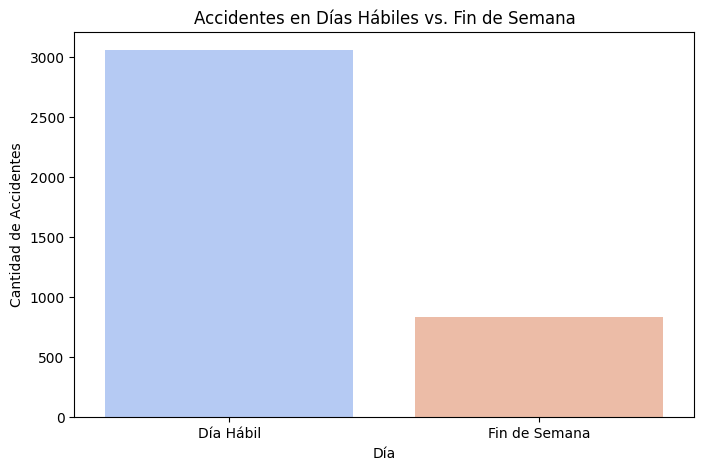

In [41]:
# Comparación de accidentes en días de semana vs. fines de semana
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_de_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
sns.countplot(x=df['es_fin_de_semana'], palette='coolwarm')
plt.xticks(ticks=[0,1], labels=['Día Hábil', 'Fin de Semana'])
plt.title("Accidentes en Días Hábiles vs. Fin de Semana")
plt.xlabel("Día")
plt.ylabel("Cantidad de Accidentes")
plt.show()

El gráfico muestra una mayor ocurrencia de accidentes en días hábiles en comparación con los fines de semana, lo que puede estar relacionado con el aumento de la movilidad laboral y escolar durante los días de semana.

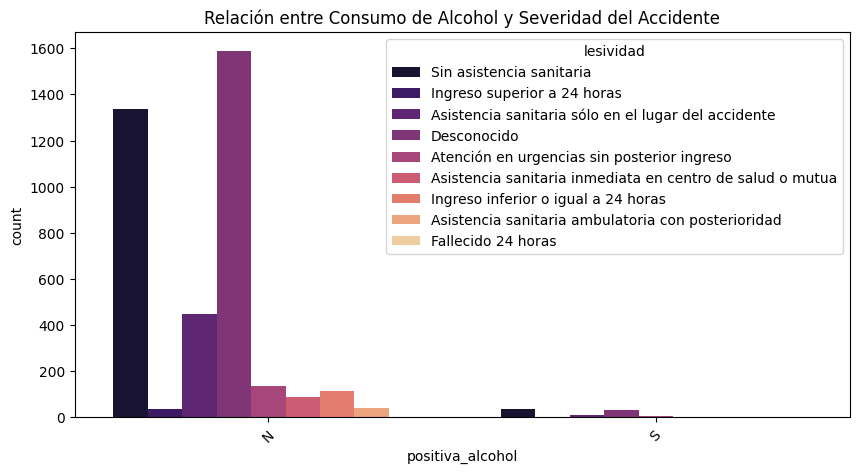

In [43]:
# Relación entre consumo de alcohol/drogas y severidad
df_alcohol = df[df['positiva_alcohol'] != 'Desconocido']
plt.figure(figsize=(10,5))
sns.countplot(x=df_alcohol["positiva_alcohol"], hue=df_alcohol["lesividad"], palette="magma")
plt.title("Relación entre Consumo de Alcohol y Severidad del Accidente")
plt.xticks(rotation=45)
plt.show()


Los accidentes con resultado positivo en alcohol muestran una tendencia a tener una severidad mayor en comparación con aquellos sin consumo, destacando el riesgo asociado al alcohol al volante.

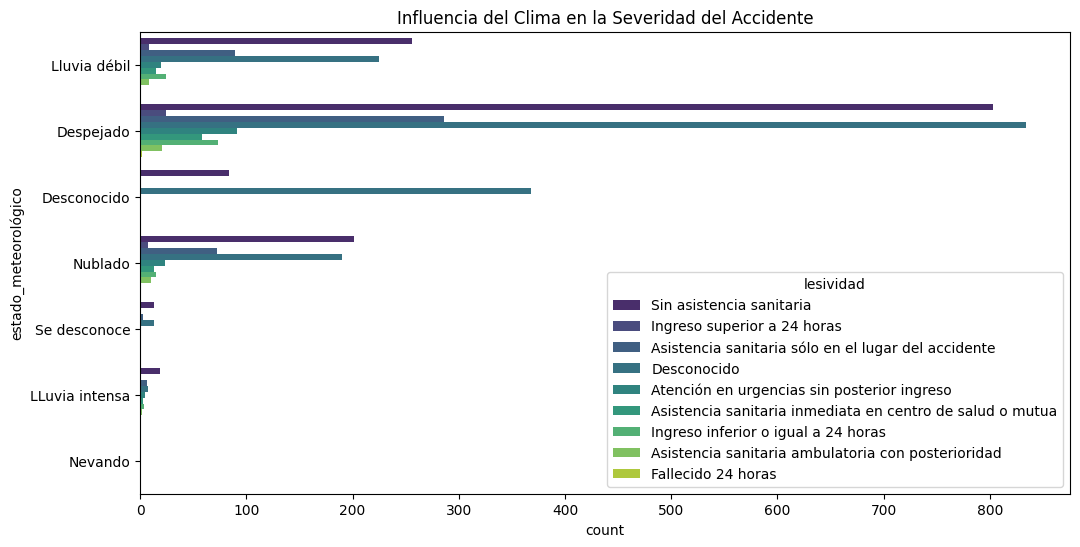

In [44]:
# Influencia de las condiciones meteorológicas en la severidad
plt.figure(figsize=(12,6))
sns.countplot(y=df["estado_meteorológico"], hue=df["lesividad"], palette="viridis")
plt.title("Influencia del Clima en la Severidad del Accidente")
plt.show()

Las condiciones meteorológicas adversas, como lluvia o niebla, están asociadas con mayores índices de lesividad, mientras que en condiciones despejadas los accidentes tienden a ser menos graves.

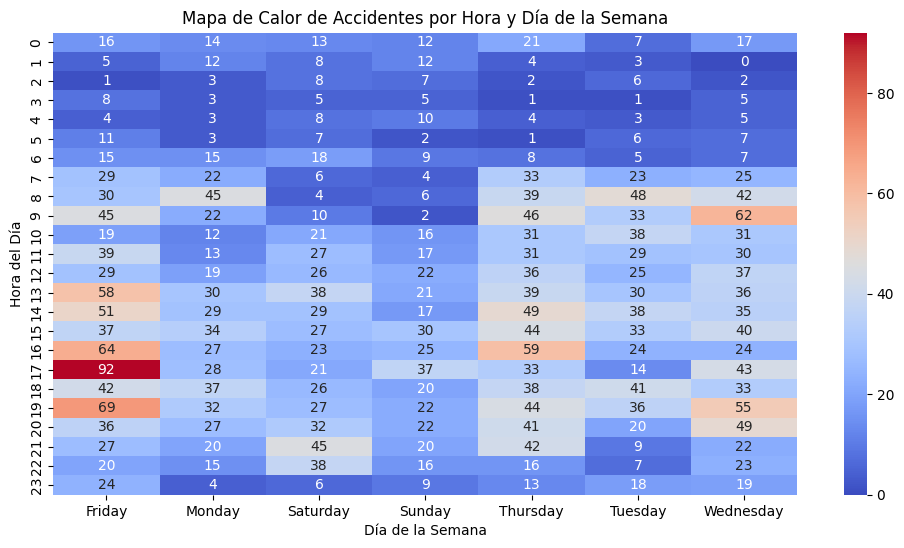

In [45]:
# Mapa de calor de accidentes por hora y día de la semana
df_heatmap = df.pivot_table(index='hora', columns='dia_semana', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(df_heatmap, cmap='coolwarm', annot=True, fmt='d')
plt.title("Mapa de Calor de Accidentes por Hora y Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Hora del Día")
plt.show()

El mapa de calor muestra una mayor frecuencia de accidentes durante los días laborales y en las horas pico de la mañana y la tarde, reflejando el impacto del tráfico y la rutina diaria en la accidentalidad.

<ipython-input-49-5c66dac34fac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="positiva_alcohol", y="hora", palette="magma")


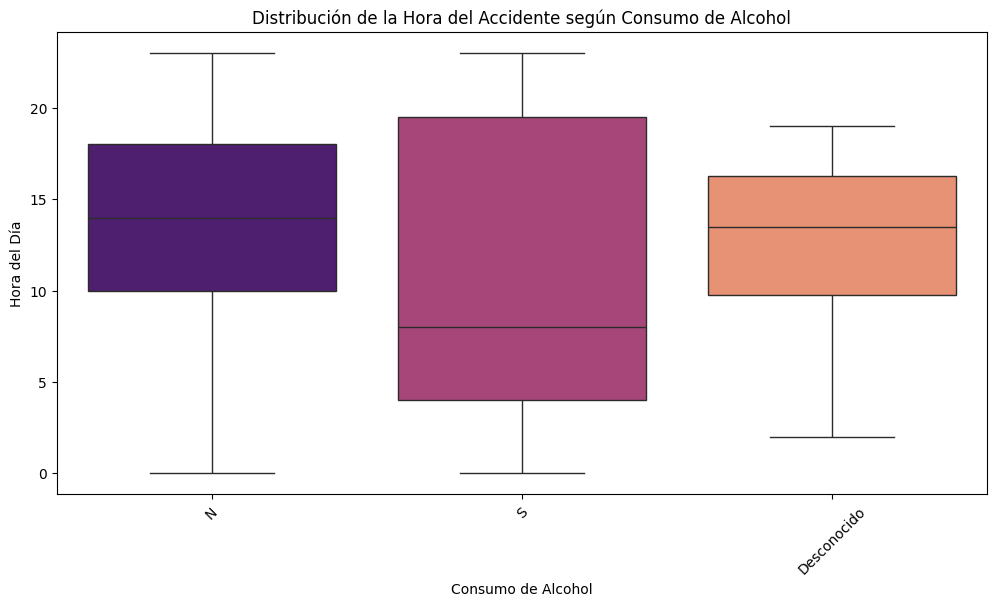

In [49]:
# Boxplot de hora del accidente según consumo de alcohol
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="positiva_alcohol", y="hora", palette="magma")
plt.title("Distribución de la Hora del Accidente según Consumo de Alcohol")
plt.xlabel("Consumo de Alcohol")
plt.ylabel("Hora del Día")
plt.xticks(rotation=45)
plt.show()

El gráfico muestra que los accidentes con consumo de alcohol ocurren principalmente en horarios nocturnos y de madrugada, mientras que los accidentes sin consumo de alcohol se distribuyen de manera más uniforme a lo largo del día

In [50]:
# Insights y Conclusiones

print("INSIGHTS Y CONCLUSIONES\n")

print("1. Impacto del Consumo de Alcohol:")
print("Los accidentes en los que hubo consumo de alcohol ocurren mayormente en horarios nocturnos y de madrugada, lo que coincide con momentos de ocio o salidas nocturnas. Además, estos accidentes tienden a ser más graves que los que ocurren sin consumo de alcohol, destacando el riesgo asociado a la conducción bajo los efectos del alcohol.\n")

print("2. Días Hábiles vs. Fines de Semana:")
print("La mayor frecuencia de accidentes se observa en días hábiles, especialmente en horarios de mayor congestión vehicular, como las horas pico de la mañana y la tarde. Esto sugiere que el aumento de la movilidad laboral y escolar contribuye significativamente a la accidentalidad.\n")

print("3. Condiciones Meteorológicas:")
print("Si bien la mayoría de los accidentes ocurren en condiciones de cielo despejado o nuboso, cuando el clima es adverso (como lluvia o niebla), la severidad de los accidentes tiende a ser mayor. Esto resalta la importancia de tomar precauciones adicionales al conducir bajo condiciones meteorológicas desfavorables.\n")

print("4. Distribución Horaria de los Accidentes:")
print("Existe un patrón claro de mayor incidencia de accidentes en horas pico, lo que coincide con el flujo vehicular intenso de ingreso y salida laboral. La congestión vial y el estrés al conducir podrían ser factores contribuyentes en estos horarios críticos.\n")

print("5. Distribución por Distritos:")
print("Algunos distritos presentan una concentración mucho mayor de accidentes, lo que podría estar vinculado a factores como la densidad de tráfico, características urbanas o puntos críticos de riesgo vial.\n")

print("6. Lesividad de los Accidentes:")
print("La mayoría de los accidentes son de carácter leve, aunque la proporción de accidentes graves o fatales aumenta en circunstancias específicas, como consumo de alcohol o condiciones climáticas adversas.\n")

print("7. Relación Vehículo-Severidad:")
print("Ciertos tipos de vehículos presentan una mayor predisposición a generar accidentes con mayor severidad, lo que podría indicar la necesidad de campañas de concientización dirigidas a conductores de vehículos específicos o medidas de seguridad adicionales.\n")


INSIGHTS Y CONCLUSIONES

1. Impacto del Consumo de Alcohol:
Los accidentes en los que hubo consumo de alcohol ocurren mayormente en horarios nocturnos y de madrugada, lo que coincide con momentos de ocio o salidas nocturnas. Además, estos accidentes tienden a ser más graves que los que ocurren sin consumo de alcohol, destacando el riesgo asociado a la conducción bajo los efectos del alcohol.

2. Días Hábiles vs. Fines de Semana:
La mayor frecuencia de accidentes se observa en días hábiles, especialmente en horarios de mayor congestión vehicular, como las horas pico de la mañana y la tarde. Esto sugiere que el aumento de la movilidad laboral y escolar contribuye significativamente a la accidentalidad.

3. Condiciones Meteorológicas:
Si bien la mayoría de los accidentes ocurren en condiciones de cielo despejado o nuboso, cuando el clima es adverso (como lluvia o niebla), la severidad de los accidentes tiende a ser mayor. Esto resalta la importancia de tomar precauciones adicionales al co